In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#creating dataframe

df = pd.read_csv('data1.csv',sep = ';')

In [ ]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [ ]:
df.shape

(3333, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [ ]:
df['location code'].unique()

array([415, 408, 510])

In [ ]:
df['location code'] = df['location code'].astype(str)

In [ ]:
df['credit card info save'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['credit card info save'] = df['credit card info save'].replace({'yes':1,'no':0})
df['push status'] = df['push status'].replace({'yes':1,'no':0})

In [ ]:
df['avg order value'] = df['avg order value'].str.replace(',','.').astype(float)
df['discount rate per visited products'] = df['discount rate per visited products'].str.replace(',','.').astype(float)
df['product detail view per app session'] = df['product detail view per app session'].str.replace(',','.').astype(float)
df['add to cart per session'] = df['add to cart per session'].str.replace(',','.').astype(float)

In [ ]:
df = pd.get_dummies(df, columns = ['location code'])

In [ ]:
df = df.drop('user id',axis=1)

In [ ]:
df.head()

,account length,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,...,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,location code_408,location code_415,location code_510
0,128,0,1,25,265,45,17,110,197,87,...,91,11.01,10.0,3,2.70,1,0,False,True,False
1,107,0,1,26,162,27,17,123,196,103,...,103,11.45,13.7,3,3.70,1,0,False,True,False
2,137,0,0,0,243,41,10,114,121,110,...,104,7.32,12.2,5,3.29,0,0,False,True,False
3,84,1,0,0,299,51,5,71,62,88,...,89,8.86,6.6,7,1.78,2,0,True,False,False
4,75,1,0,0,167,28,13,113,148,122,...,121,8.41,10.1,3,2.73,3,0,False,True,False


In [ ]:
df.columns

Index(['account length', 'credit card info save', 'push status',
       'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn',
       'location code_408', 'location code_415', 'location code_510'],
      dtype='object')

In [ ]:
cols_to_scale =['account length',
       'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls']

scaler = Normalizer()
scaled_data = scaler.fit_transform(df[cols_to_scale])
scaled_df = pd.DataFrame(scaled_data, index = df.index , columns = cols_to_scale)


In [ ]:
scaled_df.head()

,account length,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,0.275142,0.053739,0.569631,0.096730,0.036542,0.236451,0.423461,0.187011,0.525995,0.195609,0.023667,0.021496,0.006449,0.005804,0.002150
1,0.252755,0.061417,0.382676,0.063779,0.040157,0.290551,0.462991,0.243307,0.600944,0.243307,0.027047,0.032362,0.007087,0.008740,0.002362
2,0.345945,0.000000,0.613611,0.103531,0.025251,0.287867,0.305543,0.277766,0.410589,0.262615,0.018484,0.030807,0.012626,0.008308,0.000000
3,0.208327,0.000000,0.741543,0.126484,0.012400,0.176086,0.153765,0.218247,0.488327,0.220727,0.021973,0.016369,0.017361,0.004415,0.004960
4,0.205041,0.000000,0.456559,0.076549,0.035541,0.308929,0.404615,0.333534,0.510963,0.330800,0.022992,0.027612,0.008202,0.007464,0.008202


In [ ]:
df = df.drop(cols_to_scale, axis=1)
df = pd.merge(df, scaled_df, left_index=True, right_index=True)

In [ ]:
#train test splits
x = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
#Handling Imbalanced Dataset with SMOTE (synthetic minority oversampling technique)
x_res,y_res = SMOTE().fit_resample(x,y)

In [ ]:
y_res.value_counts()

churn
0    2850
1    2850
Name: count, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20, random_state = 42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4560, 20) (1140, 20) (4560,) (1140,)


In [ ]:
#build model

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_cl.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, preds)
pre = precision_score(y_test, preds)
rec = recall_score(y_test,preds)
f1 = f1_score(y_test,preds)
print('Model accuracy for test dataset:',acc)
print('Model precision for test dataset:',pre)
print('Model recall for test dataset:',rec)
print('Model f1 score for test dataset:',f1)

Model accuracy for test dataset: 0.9289473684210526
Model precision for test dataset: 0.9202127659574468
Model recall for test dataset: 0.9351351351351351
Model f1 score for test dataset: 0.9276139410187668


In [ ]:
cm = confusion_matrix(y_test,preds)
cm

array([[540,  45],
       [ 36, 519]])

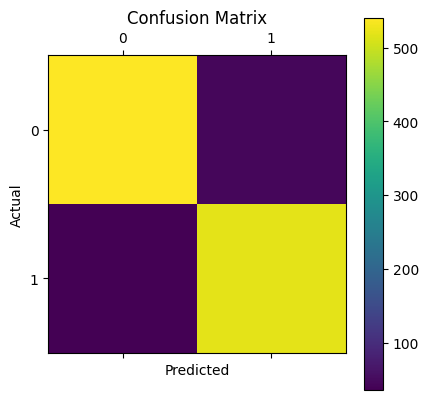

In [ ]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

In [ ]:
matrix = classification_report(y_test,preds)
print(matrix)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       585
           1       0.92      0.94      0.93       555

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



In [ ]:
#Logistic Regression
log = LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_preds1 = log.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds1)

0.7105263157894737

In [ ]:
precision_score(y_test,y_preds1)

0.7071823204419889

In [ ]:
#SVM
svm = svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_preds2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds2)

0.7201754385964912

In [ ]:
#KNeighbors Classifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_preds3 = knn.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds3)

0.8359649122807018

In [ ]:
precision_score(y_test,y_preds3)

0.7636103151862464

In [ ]:
#Decision tree Classifier
dt = DecisionTreeClassifier()


In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preds4 = dt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds4)

0.8324561403508772

In [ ]:
precision_score(y_test,y_preds4)

0.7954545454545454

In [ ]:
#Random forest classifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_preds5 = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds5)

0.9210526315789473

In [ ]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_preds6 = gbc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_preds6)

0.8526315789473684

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'ACC':[accuracy_score(y_test,y_preds1),
                                 accuracy_score(y_test,y_preds2),
                                 accuracy_score(y_test,y_preds3),
                                 accuracy_score(y_test,y_preds4),
                                 accuracy_score(y_test,y_preds5),
                                 accuracy_score(y_test,y_preds6),
                                 accuracy_score(y_test,preds)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.710526
1,SVC,0.720175
2,KNN,0.835965
3,DT,0.832456
4,RF,0.921053
5,GBC,0.852632
6,XGB,0.928947


<Axes: xlabel='Models', ylabel='ACC'>

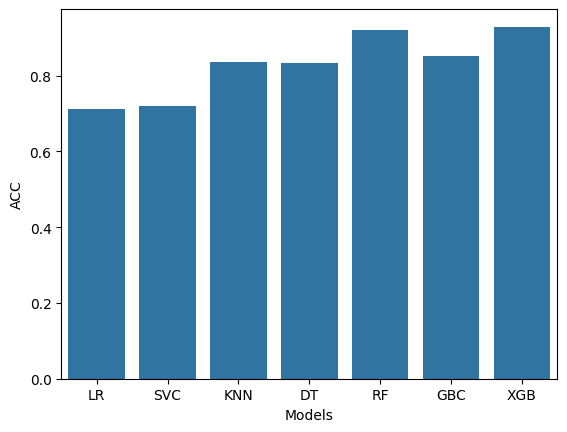

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['ACC'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'PRE':[precision_score(y_test,y_preds1),
                                 precision_score(y_test,y_preds2),
                                 precision_score(y_test,y_preds3),
                                 precision_score(y_test,y_preds4),
                                 precision_score(y_test,y_preds5),
                                 precision_score(y_test,y_preds6),
                                 precision_score(y_test,preds)]})

In [ ]:
final_data

,Models,PRE
0,LR,0.707182
1,SVC,0.722642
2,KNN,0.763610
3,DT,0.795455
4,RF,0.904348
5,GBC,0.863039
6,XGB,0.920213


<Axes: xlabel='Models', ylabel='PRE'>

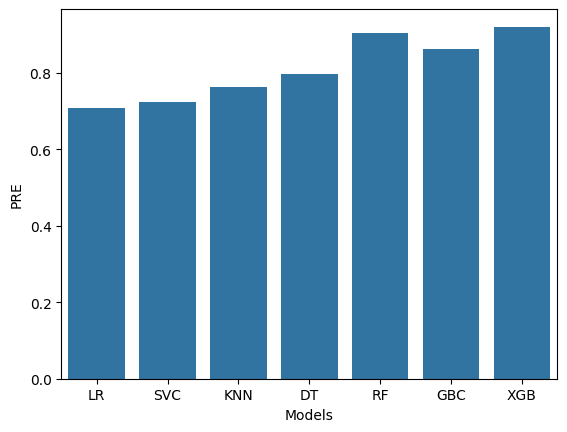

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['PRE'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'REC':[recall_score(y_test,y_preds1),
                                 recall_score(y_test,y_preds2),
                                 recall_score(y_test,y_preds3),
                                 recall_score(y_test,y_preds4),
                                 recall_score(y_test,y_preds5),
                                 recall_score(y_test,y_preds6),
                                 recall_score(y_test,preds)]})

In [ ]:
final_data

,Models,REC
0,LR,0.691892
1,SVC,0.690090
2,KNN,0.960360
3,DT,0.882883
4,RF,0.936937
5,GBC,0.828829
6,XGB,0.935135


<Axes: xlabel='Models', ylabel='REC'>

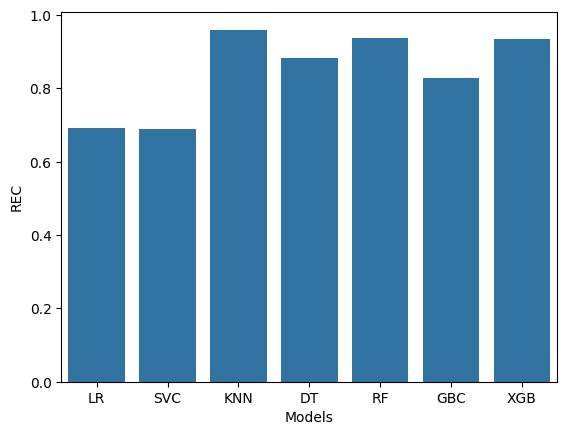

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['REC'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'F1':[f1_score(y_test,y_preds1),
                                 f1_score(y_test,y_preds2),
                                 f1_score(y_test,y_preds3),
                                 f1_score(y_test,y_preds4),
                                 f1_score(y_test,y_preds5),
                                 f1_score(y_test,y_preds6),
                                 f1_score(y_test,preds)]})

In [ ]:
final_data

,Models,F1
0,LR,0.699454
1,SVC,0.705991
2,KNN,0.850758
3,DT,0.836892
4,RF,0.920354
5,GBC,0.845588
6,XGB,0.927614


<Axes: xlabel='Models', ylabel='F1'>

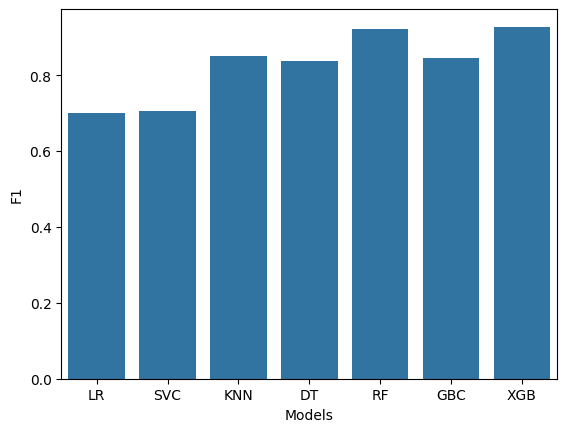

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['F1'])

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC','XGB'],
                          'AUC':[metrics.roc_auc_score(y_test,y_preds1),
                                 metrics.roc_auc_score(y_test,y_preds2),
                                 metrics.roc_auc_score(y_test,y_preds3),
                                 metrics.roc_auc_score(y_test,y_preds4),
                                 metrics.roc_auc_score(y_test,y_preds5),
                                 metrics.roc_auc_score(y_test,y_preds6),
                                 metrics.roc_auc_score(y_test,preds)]})

In [ ]:
final_data

,Models,AUC
0,LR,0.710049
1,SVC,0.719404
2,KNN,0.839155
3,DT,0.833749
4,RF,0.921460
5,GBC,0.852021
6,XGB,0.929106


<Axes: xlabel='Models', ylabel='AUC'>

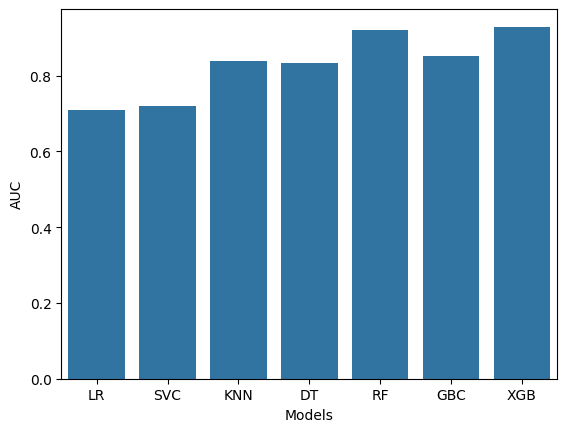

In [ ]:
sns.barplot(final_data, x=final_data['Models'],y=final_data['AUC'])

In [ ]:
#########################################################################################